### 统计推断置信区间
本笔记本演示了估计的置信区间 (CI) 的概念。 我们将检查 CI 的覆盖概率。


考虑这样一个场景：FSU 有 **20,000** 名学生，他们的智商水平服从正态分布，平均值为 **110**，标准差为 **10**。 让我们从学生群体中抽取样本，并检查样本与总体之间的关系。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

生成人口数据

(array([  48.,  288., 1185., 3287., 5481., 5239., 3162., 1050.,  230.,
          30.]),
 array([ 73.30451127,  80.71913869,  88.13376612,  95.54839355,
        102.96302097, 110.3776484 , 117.79227582, 125.20690325,
        132.62153068, 140.0361581 , 147.45078553]),
 <BarContainer object of 10 artists>)

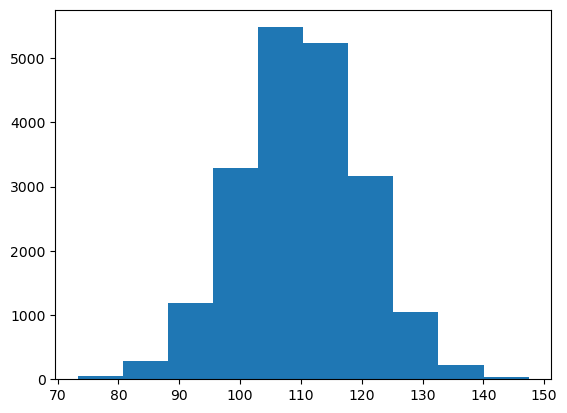

In [2]:
N = 20000 #20,000 students

#Generate from a normal distribution
data = np.random.randn(N)*10 + 110

plt.hist(data)

In [3]:
print("Population mean is:", np.mean(data))
print("Population variance is:", np.var(data))

Population mean is: 110.01962672036136
Population variance is: 102.25452537436367



### 现在让我们抽取样本。 让我们从 10 名学生的样本开始

In [4]:
#One sample with 10 numbers

sample_10 = np.random.choice(data, 10)

sample_10

array([109.62388683,  91.97729472, 100.46429321, 111.00988364,
       108.31788058, 113.66683355, 109.74268367, 113.06416223,
       105.39076392, 122.01725268])

In [5]:
print("The sample mean is: ", np.mean(sample_10))

The sample mean is:  108.52749350347217


### 如果我们重复采样过程（例如 1,000 次）怎么样？

从 t 分布获取临界 t 值。 自由度：10-1（样本大小 - 1）。 置信区间宽度：95%。

In [6]:
from scipy import stats

t = stats.t.ppf(1-0.05/2, 9)
print(t)

d:\work\miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


2.2621571627409915


In [7]:
coverage_list = []

for i in range(1000):
    #generate a sample with 10 numbers
    sample = np.random.choice(data, 10)
    
    #compute sample mean
    sample_mean = np.mean(sample)
    
    err_of_margin = t*np.std(sample)/np.sqrt(10)
    
    CI_lower = sample_mean - err_of_margin
    CI_upper = sample_mean + err_of_margin
    
    true_mean = np.mean(data)
    
    is_covered = (true_mean>=CI_lower) and (true_mean<=CI_upper)
    
    print(i," 95% confidence interval ", [CI_lower, CI_upper], "Cover the true mean?", is_covered)
    
    coverage_list.append(is_covered)

0  95% confidence interval  [102.7151079840605, 118.2405606324954] Cover the true mean? True
1  95% confidence interval  [104.23885267719237, 118.10221181506196] Cover the true mean? True
2  95% confidence interval  [103.72346627181192, 115.9391835906615] Cover the true mean? True
3  95% confidence interval  [104.62550349440005, 115.14252771113254] Cover the true mean? True
4  95% confidence interval  [102.12727319514039, 112.16268597210077] Cover the true mean? True
5  95% confidence interval  [101.08352856103731, 118.69180761678739] Cover the true mean? True
6  95% confidence interval  [103.18857595332162, 113.00591633235916] Cover the true mean? True
7  95% confidence interval  [103.55533372607188, 110.30496134366432] Cover the true mean? True
8  95% confidence interval  [90.18976464492026, 103.9824575401898] Cover the true mean? False
9  95% confidence interval  [102.14358563332436, 115.72116848794366] Cover the true mean? True
10  95% confidence interval  [100.80227845656053, 111.

我们观察到，CI 有时覆盖均值，有时则不覆盖。 那么真实的覆盖概率是多少呢？

In [8]:
np.sum(coverage_list)

933

In [9]:
np.sum(coverage_list)/len(coverage_list)*100

93.30000000000001

从上面的例子来看，是93.4%，相当接近95%。

与我们检查样本均值偏差时类似，如果我们进行更多采样 (10,000 -> 1,000,000)，覆盖率将更接近 95%

In [10]:
coverage_list = []

for i in range(100000):
    #generate a sample with 10 numbers
    sample = np.random.choice(data, 10)
    
    #compute sample mean
    sample_mean = np.mean(sample)
    
    err_of_margin = t*np.std(sample)/np.sqrt(10)
    
    CI_lower = sample_mean - err_of_margin
    CI_upper = sample_mean + err_of_margin
    
    true_mean = np.mean(data)
    
    is_covered = (true_mean>=CI_lower) and (true_mean<=CI_upper)
    
    print(i," 95% confidence interval ", sample_mean, "Cover the true mean?", is_covered)
    
    coverage_list.append(is_covered)

0  95% confidence interval  102.27640271671821 Cover the true mean? False
1  95% confidence interval  116.9976972555902 Cover the true mean? True
2  95% confidence interval  110.33082657720936 Cover the true mean? True
3  95% confidence interval  110.3496268249688 Cover the true mean? True
4  95% confidence interval  109.98877218097407 Cover the true mean? True
5  95% confidence interval  110.35499483102043 Cover the true mean? True
6  95% confidence interval  106.53854493464112 Cover the true mean? True
7  95% confidence interval  107.98521208733382 Cover the true mean? True
8  95% confidence interval  104.94301373780839 Cover the true mean? True
9  95% confidence interval  112.23694676968705 Cover the true mean? True
10  95% confidence interval  109.26360179180736 Cover the true mean? True
11  95% confidence interval  111.24777178286936 Cover the true mean? True
12  95% confidence interval  111.41470311986279 Cover the true mean? True
13  95% confidence interval  110.4272618743184 Co

In [11]:
np.sum(coverage_list)/len(coverage_list)*100

93.889